In [2]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

# Importing Libraries

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os.path as op
import pickle

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model,Sequential,load_model
from keras.layers import Input, Embedding
from keras.layers import Dense, Bidirectional
from keras.layers.recurrent import LSTM
import keras.metrics as metrics
import itertools
from tensorflow.python.keras.utils.data_utils import Sequence
from decimal import Decimal
from keras import backend as K
from keras.layers import Conv1D,MaxPooling1D,Flatten,Dense

# Data Fetching

In [15]:
inp=pd.read_csv("../PJ sensor.csv",usecols=[6,7,10,11])
out=pd.read_csv("../PJ sensor.csv",usecols=[2,3,4,5,8,9])

In [16]:
inp.head(5)

,Temperature,Relative Humidity,date,Time
0,31,65,191213,175844
1,31,65,191213,175904
2,31,65,191213,175924
3,31,65,191213,175944
4,31,66,191213,180004


In [17]:
out.head(5)

,NO2,O3,CO,SO2,PM2.5,PM10
0,-15.075377,35.714286,1766.233766,148.484848,11.229150,17.323938
1,-20.100503,41.208791,1733.766234,142.424242,9.413914,24.967407
2,-15.075377,43.956044,1711.038961,136.363636,10.350110,56.781536
3,0.000000,57.692308,1688.311688,139.393939,10.488765,30.371115
4,-20.100503,54.945055,1681.818182,130.303030,12.353048,188.026886


In [18]:
inp=np.array(inp)
out=np.array(out)

# Min Max Scaler

In [19]:
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj=MinMaxScaler()
X1=scaler_obj.fit_transform(inp)
Y1=scaler_obj.fit_transform(out)

warnings.filterwarnings(action='ignore', category=UserWarning)

X1=X1[:,np.newaxis,:]
Y1=Y1[:,np.newaxis,:]

In [20]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [21]:
Y1.shape

(1627533, 1, 6)

# Model

In [22]:
model1 = Sequential()
model1.add(keras.Input(shape=(1,4)))
model1.add(tf.keras.layers.LSTM(6,activation="relu",use_bias=True,kernel_initializer="glorot_uniform",bias_initializer="zeros"))
model1.add(Dense(6))
model1.add(keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,
                                beta_initializer="zeros",gamma_initializer="ones",
                                moving_mean_initializer="zeros",moving_variance_initializer="ones",trainable=True))
model1.add(keras.layers.ReLU())
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='mse',metrics=['accuracy','mse','mae',rmse])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 6)                 264       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 batch_normalization_1 (Batc  (None, 6)                24        
 hNormalization)                                                 
                                                                 
 re_lu_1 (ReLU)              (None, 6)                 0         
                                                                 
Total params: 330
Trainable params: 318
Non-trainable params: 12
_________________________________________________________________


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)

model_fit8 = model1.fit(x_train,y_train,batch_size=256,epochs=50, validation_split=0.1)

Epoch 1/50
4292/4292 [==============================] - 51s 12ms/step - loss: 0.1607 - accuracy: 0.2239 - mse: 0.1607 - mae: 0.2881 - rmse: 0.3668 - val_loss: 0.1008 - val_accuracy: 0.1962 - val_mse: 0.1008 - val_mae: 0.2332 - val_rmse: 0.3014
Epoch 2/50
4292/4292 [==============================] - 48s 11ms/step - loss: 0.0720 - accuracy: 0.2530 - mse: 0.0720 - mae: 0.1843 - rmse: 0.2550 - val_loss: 0.0565 - val_accuracy: 0.3656 - val_mse: 0.0566 - val_mae: 0.1570 - val_rmse: 0.2268
Epoch 3/50
4292/4292 [==============================] - 48s 11ms/step - loss: 0.0489 - accuracy: 0.4163 - mse: 0.0489 - mae: 0.1393 - rmse: 0.2118 - val_loss: 0.0438 - val_accuracy: 0.4392 - val_mse: 0.0438 - val_mae: 0.1254 - val_rmse: 0.2009
Epoch 4/50
4292/4292 [==============================] - 49s 11ms/step - loss: 0.0405 - accuracy: 0.4709 - mse: 0.0405 - mae: 0.1155 - rmse: 0.1924 - val_loss: 0.0377 - val_accuracy: 0.4978 - val_mse: 0.0377 - val_mae: 0.1075 - val_rmse: 0.1848
Epoch 5/50
4292/4292 [==

4292/4292 [==============================] - 49s 12ms/step - loss: 8.2874e-04 - accuracy: 0.9970 - mse: 8.2874e-04 - mae: 0.0179 - rmse: 0.0245 - val_loss: 8.2996e-04 - val_accuracy: 0.9971 - val_mse: 8.2996e-04 - val_mae: 0.0180 - val_rmse: 0.0245
Epoch 34/50
4292/4292 [==============================] - 50s 12ms/step - loss: 8.2874e-04 - accuracy: 0.9969 - mse: 8.2875e-04 - mae: 0.0179 - rmse: 0.0245 - val_loss: 8.2993e-04 - val_accuracy: 0.9971 - val_mse: 8.2993e-04 - val_mae: 0.0179 - val_rmse: 0.0245
Epoch 35/50
4292/4292 [==============================] - 49s 11ms/step - loss: 8.2874e-04 - accuracy: 0.9970 - mse: 8.2874e-04 - mae: 0.0179 - rmse: 0.0245 - val_loss: 8.2992e-04 - val_accuracy: 0.9971 - val_mse: 8.2992e-04 - val_mae: 0.0180 - val_rmse: 0.0245
Epoch 36/50
4292/4292 [==============================] - 49s 11ms/step - loss: 8.2874e-04 - accuracy: 0.9969 - mse: 8.2873e-04 - mae: 0.0179 - rmse: 0.0245 - val_loss: 8.2993e-04 - val_accuracy: 0.9971 - val_mse: 8.2993e-04 - val

In [24]:
model1.evaluate(x_test,y_test)

12716/12716 [==============================] - 65s 5ms/step - loss: 8.2545e-04 - accuracy: 0.9970 - mse: 8.2545e-04 - mae: 0.0179 - rmse: 0.0244


[0.0008254460990428925,
 0.9970064759254456,
 0.0008254493586719036,
 0.017900414764881134,
 0.0244365893304348]

In [25]:
model1.evaluate(x_train,y_train)

38146/38146 [==============================] - 207s 5ms/step - loss: 8.2887e-04 - accuracy: 0.9970 - mse: 8.2886e-04 - mae: 0.0179 - rmse: 0.0245


[0.0008288674289360642,
 0.9969671964645386,
 0.000828864926006645,
 0.017937108874320984,
 0.02448420785367489]

In [26]:
df1=pd.DataFrame(model_fit8.history['loss'],columns=["Loss"])
df1=df1.join(pd.DataFrame(model_fit8.history["val_loss"],columns=["Val Loss"]))
df1=df1.join(pd.DataFrame(model_fit8.history["accuracy"],columns=['Accuracy']))
df1=df1.join(pd.DataFrame(model_fit8.history["val_accuracy"],columns=['Val Accuracy']))
df1=df1.join(pd.DataFrame(model_fit8.history["mse"],columns=['MSE']))
df1=df1.join(pd.DataFrame(model_fit8.history["val_mse"],columns=['Val MSE']))
df1=df1.join(pd.DataFrame(model_fit8.history["mae"],columns=['MAE']))
df1=df1.join(pd.DataFrame(model_fit8.history["val_mae"],columns=['Val MAE']))
df1=df1.join(pd.DataFrame(model_fit8.history["rmse"],columns=['RMSE']))
df1=df1.join(pd.DataFrame(model_fit8.history["val_mse"],columns=['Val RMSE']))
df1

,Loss,Val Loss,Accuracy,Val Accuracy,MSE,Val MSE,MAE,Val MAE,RMSE,Val RMSE
0,0.160686,0.100757,0.223913,0.196209,0.160689,0.100760,0.288070,0.233210,0.366820,0.100760
1,0.072035,0.056549,0.253036,0.365569,0.072036,0.056550,0.184251,0.156996,0.254991,0.056550
2,0.048927,0.043812,0.416341,0.439154,0.048927,0.043812,0.139280,0.125362,0.211848,0.043812
3,0.040461,0.037692,0.470912,0.497792,0.040461,0.037693,0.115452,0.107519,0.192373,0.037693
4,0.035160,0.032279,0.498941,0.500120,0.035161,0.032280,0.102032,0.096846,0.176774,0.032280
5,0.028677,0.024693,0.482529,0.496646,0.028677,0.024694,0.091760,0.084686,0.155997,0.024694
6,0.022099,0.019621,0.533924,0.564858,0.022099,0.019621,0.079562,0.073526,0.132511,0.019621
7,0.017547,0.015233,0.599489,0.636818,0.017547,0.015234,0.068297,0.063108,0.112922,0.015234
8,0.011661,0.007913,0.594140,0.591722,0.011661,0.007913,0.060860,0.055425,0.095786,0.007913
9,0.006192,0.004838,0.659397,0.796855,0.006192,0.004838,0.049148,0.043138,0.072967,0.004838


In [27]:
df1.to_excel("PJ_LSTM.xlsx")

# Saving Model as File

In [28]:
model_json = model1.to_json()
with open("lstmpj.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model1.save_weights("lstmpj.h5")
print("Saved model to disk")

Saved model to disk


In [29]:
from keras.models import model_from_json
json_file = open('lstmpj.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("lstmpj.h5")
print("Loaded model from disk")
loaded_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='mse',metrics=['accuracy','mse','mae',rmse])

Loaded model from disk


# Error Analysis

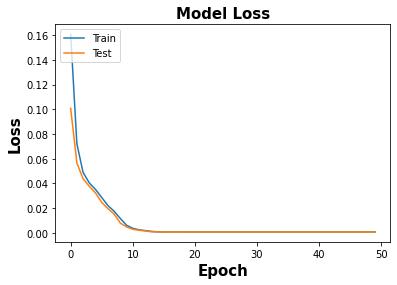

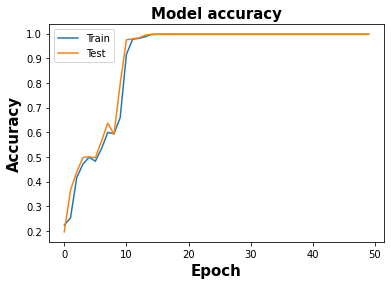

In [30]:
# summarize history for loss
plt.plot(model_fit8.history['loss'])
plt.plot(model_fit8.history['val_loss'])
plt.title('Model Loss',fontweight ='bold',fontsize = 15)
plt.ylabel('Loss',fontweight ='bold',fontsize = 15)
plt.xlabel('Epoch',fontweight ='bold',fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(model_fit8.history['accuracy'])
plt.plot(model_fit8.history['val_accuracy'])
plt.title('Model accuracy',fontweight ='bold',fontsize = 15)
plt.ylabel('Accuracy',fontweight ='bold',fontsize = 15)
plt.xlabel('Epoch',fontweight ='bold',fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)

y_test_pred=loaded_model.predict(x_test)
y_test_pred